# Assignment 1: Titanic Survival Prediction
# • Task: Use the Titanic dataset to build a decision tree model to predict survival.
# • Objectives:
# o Perform feature engineering (encode categorical variables)
# o Use DecisionTreeClassifier from scikit-learn
# o Visualize the tree and compute accuracy

📦 1. Load and preprocess the dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Titanic dataset (can use seaborn for example dataset)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Drop rows with missing target values and features we'll use
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].dropna()

# Encode categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

titanic['sex'] = le_sex.fit_transform(titanic['sex'])
titanic['embarked'] = le_embarked.fit_transform(titanic['embarked'])

# Features and target
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🌳 2. Train Decision Tree & Evaluate

In [2]:
# Create and train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.6643356643356644


🖼️ 3. Visualize the tree

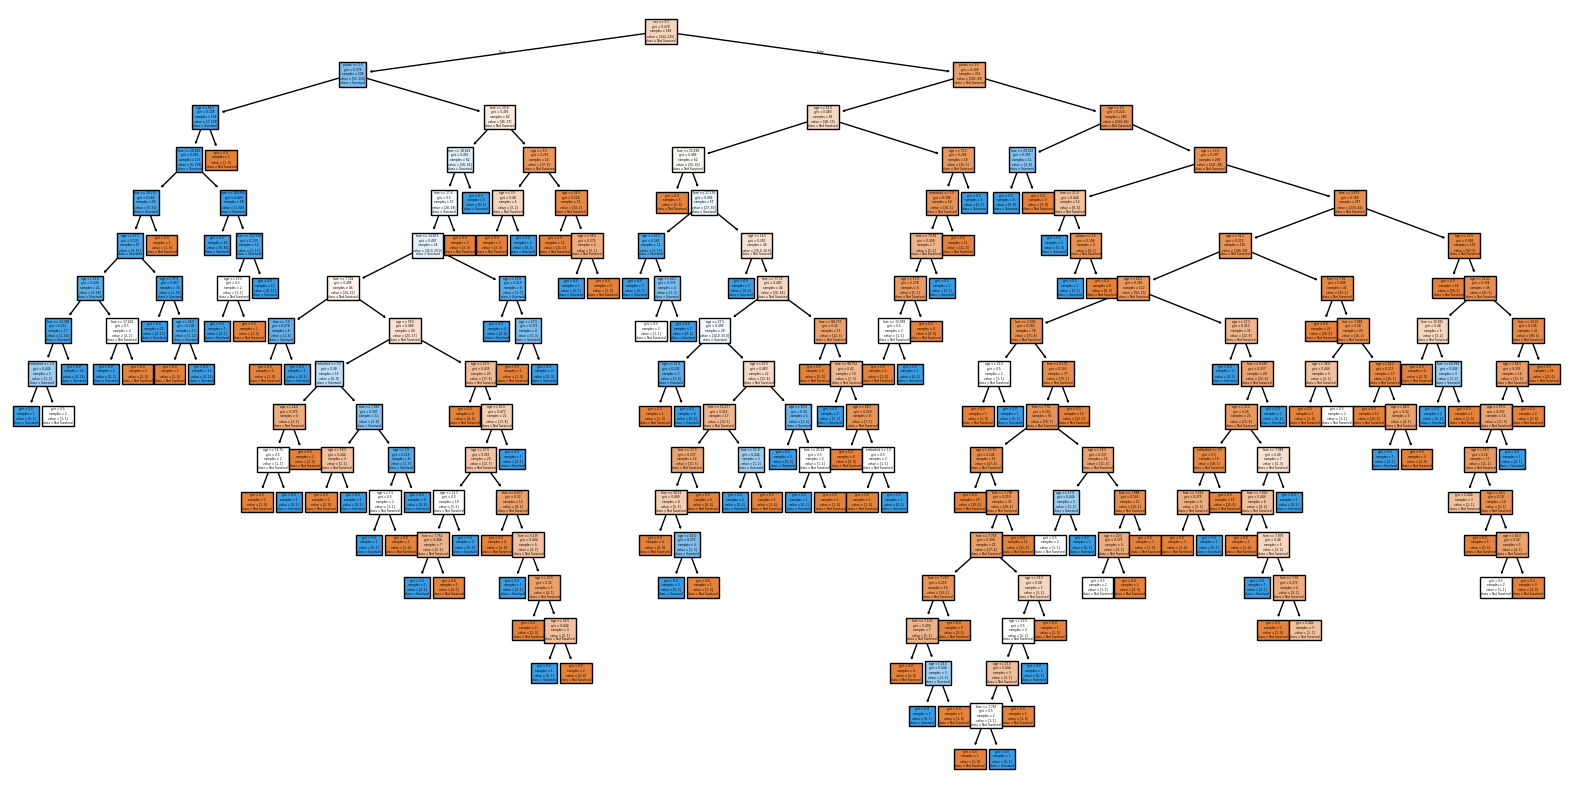

In [3]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


Assignment 2: Decision Tree Pruning Experiment

• Task: Use the Iris dataset to build multiple decision trees with varying
max_depth.

• Objectives:

o Compare performance for different depths

o Plot depth vs. accuracy

o Identify overfitting vs. underfitting

---



🌸 1. Load Iris dataset


In [4]:
from sklearn.datasets import load_iris

# Load Iris
iris = load_iris()
X = iris.data
y = iris.target


📊 2. Train models with varying depths

In [5]:
depths = range(1, 11)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X, y)
    acc = clf.score(X, y)  # using training accuracy for simplicity
    accuracies.append(acc)
    print(f"Depth: {depth}, Accuracy: {acc:.4f}")


Depth: 1, Accuracy: 0.6667
Depth: 2, Accuracy: 0.9600
Depth: 3, Accuracy: 0.9733
Depth: 4, Accuracy: 0.9933
Depth: 5, Accuracy: 1.0000
Depth: 6, Accuracy: 1.0000
Depth: 7, Accuracy: 1.0000
Depth: 8, Accuracy: 1.0000
Depth: 9, Accuracy: 1.0000
Depth: 10, Accuracy: 1.0000


📈 3. Plot Depth vs Accuracy

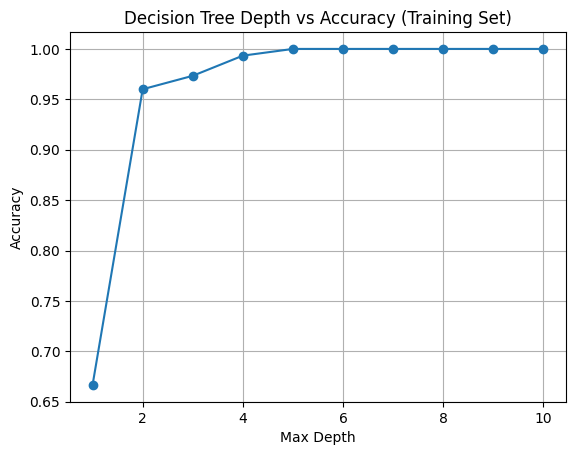

In [6]:
plt.plot(depths, accuracies, marker='o')
plt.title("Decision Tree Depth vs Accuracy (Training Set)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
